# hotel bookings - customer 

In [8]:
import numpy as np 
from numpy import median
import pandas as pd
from datetime import datetime, date
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "vscode"
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)

In [9]:
df = pd.read_pickle("../sanity/bookings.pkl")
#link do dataset: https://www.kaggle.com/jessemostipak/hotel-booking-demand
#artigo do dataset: https://www.sciencedirect.com/science/article/pii/S2352340918315191
df.drop(columns = "index")

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,missing_agent,missing_company,arrival_date,arrival_weekday,enter_date,lead_time_int
0,Resort Hotel,0,13 days,2015,7,27,1,0,1,1,...,0,0,Check-Out,2015-07-02,0,1,2015-07-01,Wednesday,2015-06-18,13
1,Resort Hotel,0,14 days,2015,7,27,1,0,2,2,...,0,1,Check-Out,2015-07-03,0,1,2015-07-01,Wednesday,2015-06-17,14
2,Resort Hotel,0,14 days,2015,7,27,1,0,2,2,...,0,1,Check-Out,2015-07-03,0,1,2015-07-01,Wednesday,2015-06-17,14
3,Resort Hotel,0,9 days,2015,7,27,1,0,2,2,...,0,1,Check-Out,2015-07-03,0,1,2015-07-01,Wednesday,2015-06-22,9
4,Resort Hotel,1,85 days,2015,7,27,1,0,3,2,...,0,1,Canceled,2015-05-06,0,1,2015-07-01,Wednesday,2015-04-07,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102889,City Hotel,0,23 days,2017,8,35,30,2,5,2,...,0,0,Check-Out,2017-09-06,0,1,2017-08-30,Wednesday,2017-08-07,23
102890,City Hotel,0,102 days,2017,8,35,31,2,5,3,...,0,2,Check-Out,2017-09-07,0,1,2017-08-31,Thursday,2017-05-21,102
102891,City Hotel,0,34 days,2017,8,35,31,2,5,2,...,0,4,Check-Out,2017-09-07,0,1,2017-08-31,Thursday,2017-07-28,34
102892,City Hotel,0,109 days,2017,8,35,31,2,5,2,...,0,0,Check-Out,2017-09-07,0,1,2017-08-31,Thursday,2017-05-14,109


In [10]:
operacoes = {"lead_time":"count"}
aux = df.groupby(['country']).agg(operacoes).reset_index()
aux = aux.sort_values(by = "lead_time", ascending = False)
aux = aux[aux['lead_time'] > 60]

In [11]:
df['country_count'] = df.groupby(['country'])['lead_time'].transform('count')
df['country'].value_counts()

PRT    37591
GBR    10889
FRA     9810
ESP     7848
DEU     6998
       ...  
FJI        1
MWI        1
UMI        1
MLI        1
AIA        1
Name: country, Length: 174, dtype: int64

In [12]:
df = df[df['country_count'] > 60]

In [13]:
df['agent'] = df['agent'].map(int).map(str)

In [14]:
df['agent'].value_counts()

9      31098
240    13674
1       7187
14      3565
7       3492
       ...  
406        1
285        1
267        1
408        1
197        1
Name: agent, Length: 330, dtype: int64

In [15]:
df.head()

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,total_of_special_requests,reservation_status,reservation_status_date,missing_agent,missing_company,arrival_date,arrival_weekday,enter_date,lead_time_int,country_count
0,3,Resort Hotel,0,13 days,2015,7,27,1,0,1,...,0,Check-Out,2015-07-02,0,1,2015-07-01,Wednesday,2015-06-18,13,10889
1,4,Resort Hotel,0,14 days,2015,7,27,1,0,2,...,1,Check-Out,2015-07-03,0,1,2015-07-01,Wednesday,2015-06-17,14,10889
2,5,Resort Hotel,0,14 days,2015,7,27,1,0,2,...,1,Check-Out,2015-07-03,0,1,2015-07-01,Wednesday,2015-06-17,14,10889
3,7,Resort Hotel,0,9 days,2015,7,27,1,0,2,...,1,Check-Out,2015-07-03,0,1,2015-07-01,Wednesday,2015-06-22,9,37591
4,8,Resort Hotel,1,85 days,2015,7,27,1,0,3,...,1,Canceled,2015-05-06,0,1,2015-07-01,Wednesday,2015-04-07,85,37591


## Variáveis associadas de destaque

In [16]:
df.columns

Index(['index', 'hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'missing_agent',
       'missing_company', 'arrival_date', 'arrival_weekday', 'enter_date',
       'lead_time_int', 'country_count'],
      dtype='object')

In [17]:
features_customer = ['hotel', 'is_canceled', 'lead_time_int', 'customer_type',
                    'is_repeated_guest', 'adults', 'children', 'babies', 'reserved_room_type',
                    'country', 'previous_cancellations','reservation_status_date','agent']

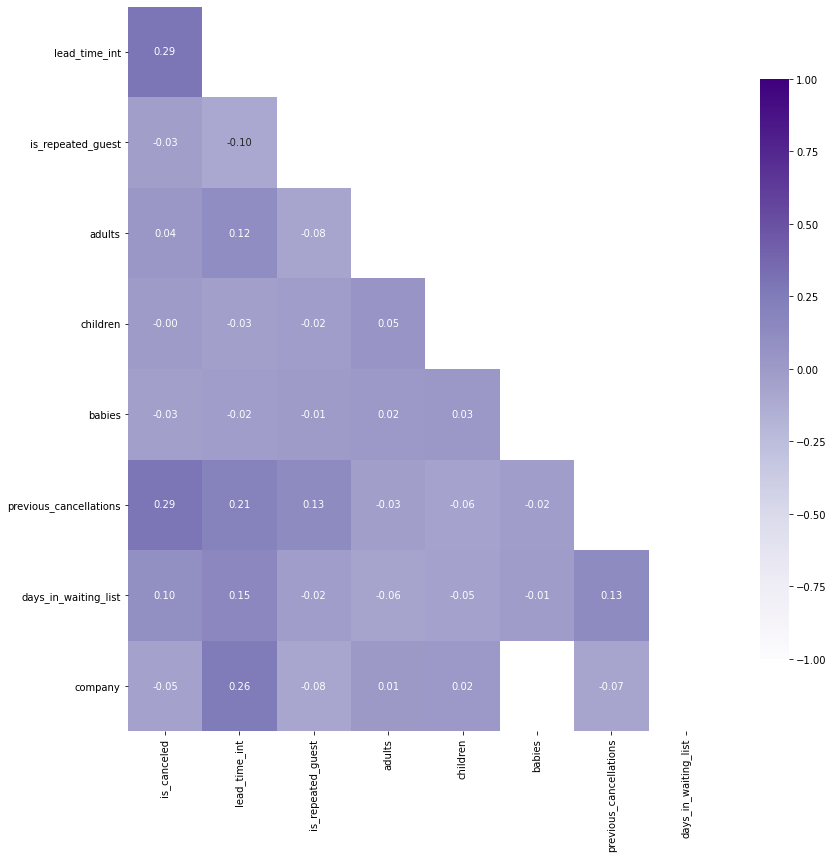

In [18]:
# SPEARMAN CORRELATION
df1 = df[['hotel', 'is_canceled', 'lead_time_int', 'customer_type',
'is_repeated_guest', 'adults', 'children', 'babies', 'reserved_room_type',
'country', 'previous_cancellations','reservation_status_date','arrival_weekday', 'enter_date', 'days_in_waiting_list','company']]

f,ax = plt.subplots(figsize=(df.shape[1]/3,df.shape[1]/3))
df_corr = df1.corr(method = "spearman")
mask = np.triu(np.ones_like(df_corr, dtype=bool))
#print(mask)
mask = mask[1:,:-1]
#print(mask)
corr = df_corr.iloc[1:,:-1].copy()
#print(corr)
sns.heatmap(corr, mask = mask,annot = True,fmt = ".2f", cmap = 'Purples', vmin = -1, vmax = 1, cbar_kws = {"shrink":.8})
plt.show()

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# customer profile
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## leisure | business ?
## a princípio não há variável direta que explicite a relação esperada

In [19]:
print(df['company'].value_counts().sum())
print(df[df['country']=='PRT']['company'].value_counts().sum())

217
82


In [20]:
df.columns

Index(['index', 'hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'missing_agent',
       'missing_company', 'arrival_date', 'arrival_weekday', 'enter_date',
       'lead_time_int', 'country_count'],
      dtype='object')

## > booking changes

quantidade total:  101352
parcela do total:  13.81 %
qtd cancelados:  2488
qtd não cancelados:  11504
razão: 64.4 %


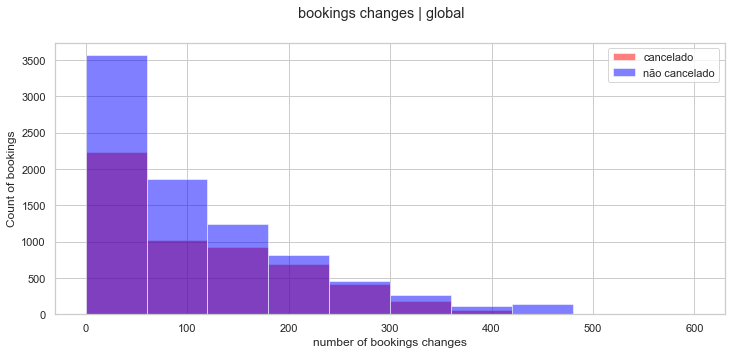

In [21]:
sns.set_theme(style = "whitegrid")
#ax = sns.barplot(x = "customer_type", y = df.count(), hue = 'is_canceled', estimator = median, data = df)
fig, ax = plt.subplots(1, 1, figsize=(12,5))
#df1 = df[df['hotel']=='City Hotel']
df1 = df[df['booking_changes'] > 0]
print("quantidade total: ", df.shape[0])
print("parcela do total: ", round(100*(df1.shape[0]/df.shape[0]),2),"%")
print("qtd cancelados: ", df1[df1["is_canceled"] > 0]["lead_time_int"].shape[0])
print("qtd não cancelados: ", df1[df1["is_canceled"] == 0]["lead_time_int"].shape[0])
ax.hist(df1[df1["hotel"] == "Resort Hotel"]["lead_time_int"], range = (0, 600), alpha = 0.5, color = "red", label = "cancelado")
ax.hist(df1[df1["hotel"] == "City Hotel"]["lead_time_int"], range = (0, 600), alpha = 0.5, color = "blue", label = "não cancelado")

ax.set_xlabel("number of bookings changes")
ax.set_ylabel("Count of bookings")

fig.suptitle(" bookings changes | global")
ax.legend()
print("razão:", round((df1[df1["stays_in_weekend_nights"] == 1].shape[0] / df1[df1["stays_in_weekend_nights"] == 0].shape[0])*100,2),"%")

## > previous cancellations

quantidade total:  101352
parcela do total:  100.0 %
qtd cancelados:  5554
qtd não cancelados:  95798


(array([28325., 15081., 10155.,  5806.,  4347.,  3356.,  1344.,  1012.,
          244.,   136.]),
 array([  0.,  60., 120., 180., 240., 300., 360., 420., 480., 540., 600.]),
 <BarContainer object of 10 artists>)

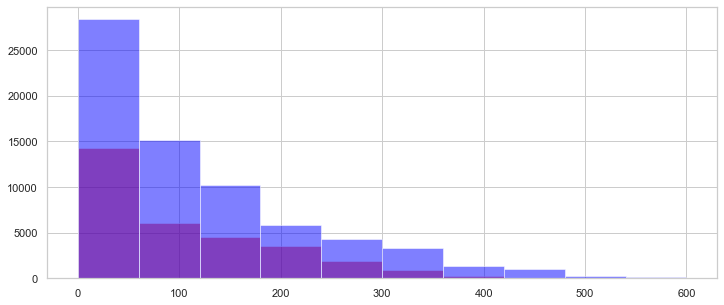

In [22]:
sns.set_theme(style = "whitegrid")
#ax = sns.barplot(x = "customer_type", y = df.count(), hue = 'is_canceled', estimator = median, data = df)
fig, ax = plt.subplots(1, 1, figsize=(12,5))
#df1 = df[df['hotel']=='City Hotel']
df1 = df
print("quantidade total: ", df.shape[0])
print("parcela do total: ", round(100*(df1.shape[0]/df.shape[0]),2),"%")
print("qtd cancelados: ", df1[df1["previous_cancellations"] > 0]["lead_time_int"].shape[0])
print("qtd não cancelados: ", df1[df1["previous_cancellations"] == 0]["lead_time_int"].shape[0])
ax.hist(df1[df1["hotel"] == "Resort Hotel"]["lead_time_int"], range = (0, 600), alpha = 0.5, color = "red", label = "cancelado")
ax.hist(df1[df1["hotel"] == "City Hotel"]["lead_time_int"], range = (0, 600), alpha = 0.5, color = "blue", label = "não cancelado")

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
## hipótese: como os hotéis se localizam em Portugal, possivelmente o comportamento dos portugueses destoará devido à proximidade e demais facilidades 
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

### No sanity, constatamos que do total de 16000 registros nulos para o registro de 'agents', cerca de 70% eram portugueses

quantidade total:  101352
quantidade de cancelados:  39535
quantidade de não cancelados:  61817
parcela referente ao total:  100.0 %
razão: 63.95 %


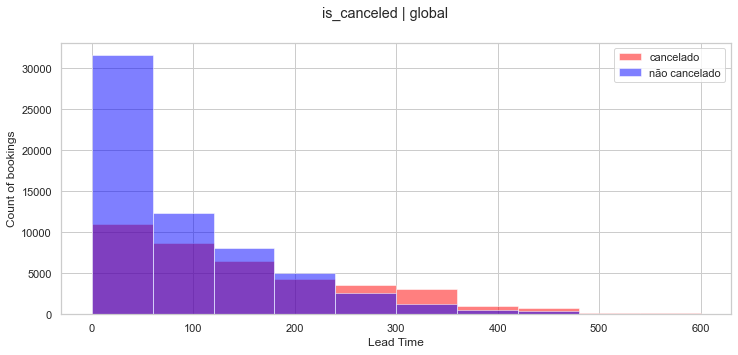

In [23]:
sns.set_theme(style = "whitegrid")
#ax = sns.barplot(x = "customer_type", y = df.count(), hue = 'is_canceled', estimator = median, data = df)
fig, ax = plt.subplots(1, 1, figsize = (12,5))

df1 = df

print("quantidade total: ", df.shape[0])
print("quantidade de cancelados: ",df1[df1["is_canceled"] == 1]["lead_time_int"].shape[0])
print("quantidade de não cancelados: ",df1[df1["is_canceled"] == 0]["lead_time_int"].shape[0])
print("parcela referente ao total: ", round(100*(df1.shape[0]/df.shape[0]),2),"%")

ax.hist(df1[df1["is_canceled"] == 1]["lead_time_int"], range = (0, 600), alpha = 0.5, color = "red", label = "cancelado")
ax.hist(df1[df1["is_canceled"] == 0]["lead_time_int"], range = (0, 600), alpha = 0.5, color = "blue", label = "não cancelado")

ax.set_xlabel("Lead Time")
ax.set_ylabel("Count of bookings")

fig.suptitle("is_canceled | global")
ax.legend()
print("razão:", round((df1[df1["is_canceled"] == 1]["lead_time_int"].shape[0] / df1[df1["is_canceled"] == 0]["lead_time_int"].shape[0])*100,2),"%")

quantidade total:  101352
quantidade de cancelados:  23725
quantidade de não cancelados:  13866
parcela referente ao total:  37.09 %
razão: 171.1 %


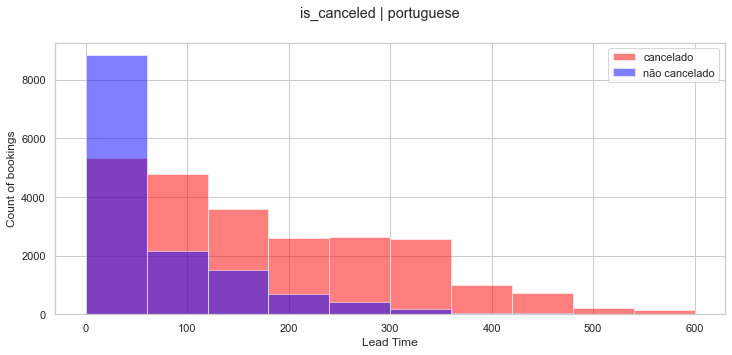

In [24]:
sns.set_theme(style = "whitegrid")
#ax = sns.barplot(x = "customer_type", y = df.count(), hue = 'is_canceled', estimator = median, data = df)
fig, ax = plt.subplots(1, 1, figsize=(12,5))

df1 = df[df['country'] == 'PRT']
print("quantidade total: ", df.shape[0])
print("quantidade de cancelados: ",df1[df1["is_canceled"]==1]["lead_time_int"].shape[0])
print("quantidade de não cancelados: ",df1[df1["is_canceled"]==0]["lead_time_int"].shape[0])
print("parcela referente ao total: ", round(100*(df1.shape[0]/df.shape[0]),2),"%")
ax.hist(df1[df1["is_canceled"]==1]["lead_time_int"], range = (0, 600), alpha=0.5, color="red", label = "cancelado")
ax.hist(df1[df1["is_canceled"]==0]["lead_time_int"], range = (0, 600), alpha=0.5, color="blue", label = "não cancelado")

ax.set_xlabel("Lead Time")
ax.set_ylabel("Count of bookings")

fig.suptitle("is_canceled | portuguese")
ax.legend()
print("razão:",round((df1[df1["is_canceled"] == 1]["lead_time_int"].shape[0] / df1[df1["is_canceled"] == 0]["lead_time_int"].shape[0])*100,2),"%")

quantidade total:  101352
quantidade de cancelados:  15810
quantidade de não cancelados:  47951
parcela referente ao total:  62.91 %
razão: 32.97 %


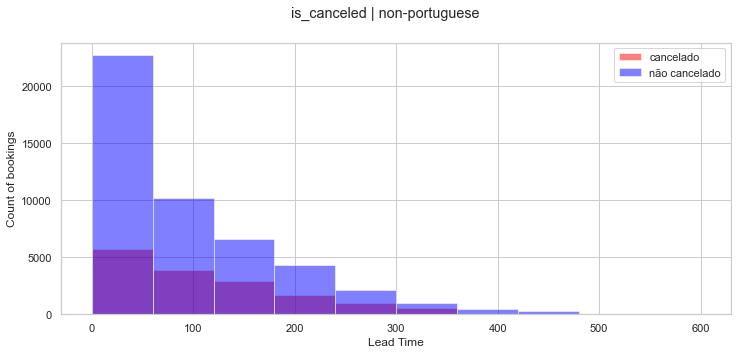

In [25]:
sns.set_theme(style = "whitegrid")
#ax = sns.barplot(x = "customer_type", y = df.count(), hue = 'is_canceled', estimator = median, data = df)
fig, ax = plt.subplots(1, 1, figsize=(12,5))

df2 = df[df['country'] != 'PRT']
print("quantidade total: ", df.shape[0])
print("quantidade de cancelados: ",df2[df2["is_canceled"]==1]["lead_time_int"].shape[0])
print("quantidade de não cancelados: ",df2[df2["is_canceled"]==0]["lead_time_int"].shape[0])
print("parcela referente ao total: ", round(100*(df2.shape[0]/df.shape[0]),2),"%")
ax.hist(df2[df2["is_canceled"]==1]["lead_time_int"], range = (0, 600), alpha=0.5, color="red", label = "cancelado")
ax.hist(df2[df2["is_canceled"]==0]["lead_time_int"], range = (0, 600), alpha=0.5, color="blue", label = "não cancelado")

ax.set_xlabel("Lead Time")
ax.set_ylabel("Count of bookings")

fig.suptitle("is_canceled | non-portuguese")
ax.legend()
print("razão:",round((df2[df2["is_canceled"] == 1]["lead_time_int"].shape[0] / df2[df2["is_canceled"] == 0]["lead_time_int"].shape[0])*100,2),"%")

## > Portugal representa 97% das previous_cancellations. (utilidade marginal)?

In [26]:
print(df[df['previous_cancellations'] != 0]['country'].value_counts())
portugues = df[df['previous_cancellations'] != 0]['country'].value_counts()[0]
mundo = df[df['previous_cancellations'] != 0]['country'].value_counts().sum()
print(round(100*portugues / mundo,2),"%")

PRT    5399
IRL      66
ESP      36
GBR      24
BEL      15
FRA       4
DEU       3
BRA       2
ITA       2
AUT       1
AGO       1
POL       1
Name: country, dtype: int64
97.21 %


In [27]:
#dataset = df[df['arrival_date_year']==2016].copy()
def boxplot_numerical_agg(df, target_col, period_col, category_order = None):

    #target_col, period_col = 'arrival_weekday', 'children'
     
    fig = go.Figure(data = [go.Box(
            x = df.loc[df[period_col] == tp, period_col],
            y = df.loc[df[period_col] == tp, target_col],
            boxmean = True,
            #order = list(calendar.day_name),
            #marker=dict(color=color_palette[i], outliercolor=outlier_color),
            name = str(tp)
        ) for indice, tp in enumerate(aux[period_col].unique())])

    if category_order is not None:
        fig.update_xaxes(categoryorder='array', categoryarray = category_order)

    fig.show()

In [28]:
df1 = df
df1 = df[df['hotel'] == 'Resort Hotel']
aux = df1.groupby(['arrival_date_month','arrival_weekday','arrival_date_year']).mean().reset_index()

boxplot_numerical_agg(df = aux, target_col = 'adr', period_col = 'arrival_date_month')

In [29]:
df1 = df
df1 = df[df['hotel'] == 'City Hotel']
aux = df1.groupby(['arrival_date_month','arrival_weekday','arrival_date_year']).mean().reset_index()

boxplot_numerical_agg(df = aux, target_col = 'adr', period_col = 'arrival_date_month')

In [30]:
df1 =df[df['country'] == 'PRT']
df1['arrival_date'] = df1['arrival_date'].apply(lambda x : datetime.combine(x, datetime.min.time()))
df1 = df1.set_index('arrival_date')
#df['arrival_date'].apply(datetime)
#df_1.set_index("arrival_date").info()
df1 = df1.resample("w").count()

C:\Users\joaov\AppData\Local\Temp/ipykernel_27404/1720857812.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [31]:
fig = px.line(data_frame = df1['lead_time'],
             title="Quantidade de Bookings ", labels={"value":"quantidade de bookings","arrival_date":"data de chegada"})
fig.show()

In [32]:
aux = df1['lead_time'].asfreq("w")

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposicao = seasonal_decompose(aux, model = "additive", extrapolate_trend = "freq")

In [34]:
fig = px.line(data_frame = decomposicao.trend,
             title="Quantidade de Bookings ", labels={"value":"quantidade de bookings","arrival_date":"data de chegada"})
fig.show()

In [35]:
fig = px.line(data_frame = decomposicao.seasonal,
             title="Quantidade de Bookings ", labels={"value":"quantidade de bookings","arrival_date":"data de chegada"})
fig.show()

In [36]:
fig = px.line(data_frame = decomposicao.resid,
             title="Quantidade de Bookings ", labels={"value":"quantidade de bookings","arrival_date":"data de chegada"})
fig.show()

In [37]:
df1 = df[df['is_canceled'] == 1]

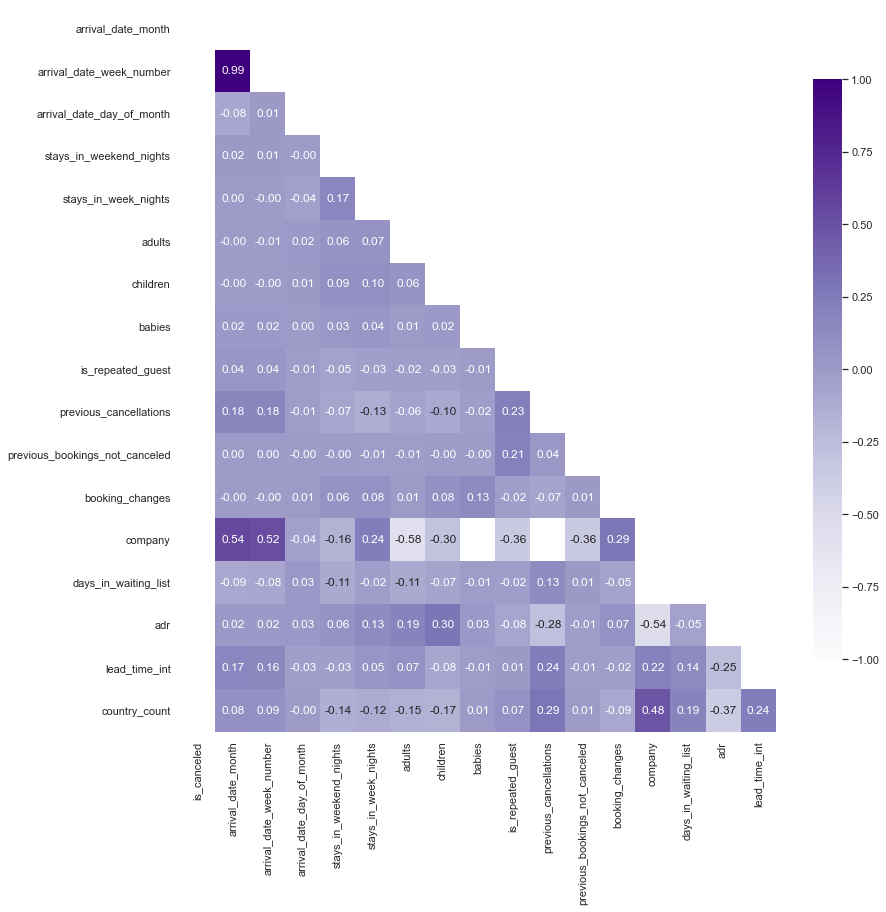

In [38]:
# SPEARMAN CORRELATION
df1 = df1[['hotel', 'is_canceled', 'lead_time',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'reservation_status', 'reservation_status_date', 'arrival_date', 'arrival_weekday',
       'lead_time_int', 'country_count']]

f,ax = plt.subplots(figsize=(df.shape[1]/3,df.shape[1]/3))
df_corr = df1.corr(method = "spearman")
mask = np.triu(np.ones_like(df_corr, dtype=bool))
#print(mask)
mask = mask[1:,:-1]
#print(mask)
corr = df_corr.iloc[1:,:-1].copy()
#print(corr)
sns.heatmap(corr, mask = mask,annot = True,fmt = ".2f", cmap = 'Purples', vmin = -1, vmax = 1, cbar_kws = {"shrink":.8})
plt.show()

## > feature 'is_repeated_guest' não parece ser muito útil por enquanto, pois o desbalanceamento é muito grande

quantidade total:  101352
quantidade de repetidos:  1440
quantidade de não repetidos:  99912
parcela referente ao total:  100.0 %
razão: 1.44 %


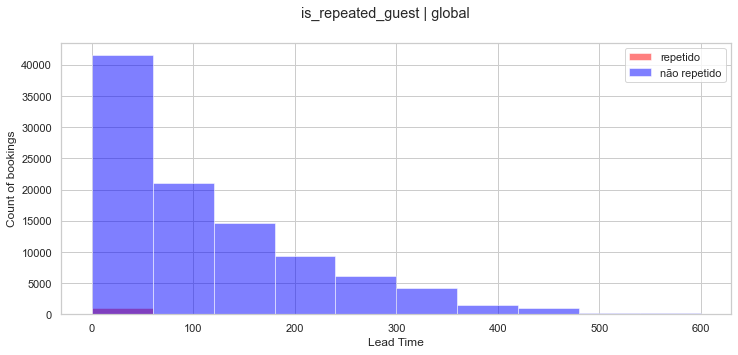

In [39]:
sns.set_theme(style = "whitegrid")
#ax = sns.barplot(x = "customer_type", y = df.count(), hue = 'is_canceled', estimator = median, data = df)
fig, ax = plt.subplots(1, 1, figsize=(12,5))

df1 = df
print("quantidade total: ", df.shape[0])
print("quantidade de repetidos: ",df1[df1["is_repeated_guest"]==1]["lead_time_int"].shape[0])
print("quantidade de não repetidos: ",df1[df1["is_repeated_guest"]==0]["lead_time_int"].shape[0])
print("parcela referente ao total: ", round(100*(df1.shape[0]/df.shape[0]),2),"%")
ax.hist(df1[df1["is_repeated_guest"]==1]["lead_time_int"], range = (0, 600), alpha=0.5, color="red", label = "repetido")
ax.hist(df1[df1["is_repeated_guest"]==0]["lead_time_int"], range = (0, 600), alpha=0.5, color="blue", label = "não repetido")

ax.set_xlabel("Lead Time")
ax.set_ylabel("Count of bookings")

fig.suptitle("is_repeated_guest | global")
ax.legend()
print("razão:", round((df1[df1["is_repeated_guest"] == 1]["lead_time_int"].shape[0] / df1[df1["is_repeated_guest"] == 0]["lead_time_int"].shape[0])*100,2),"%")